In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
#import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, plot_roc_curve, accuracy_score

pd.set_option('display.max_columns', None) 
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [2]:
from pandas.plotting import scatter_matrix

from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.base import clone

%matplotlib inline
import matplotlib.pyplot as plt

from utils import XyScaler
from roc_curve2 import roc_curve

In [3]:
checker = pd.read_csv('/home/allen/Galva/capstones/capstone2/src/explore/train_4_model.csv')

In [4]:
df_withID = pd.read_csv('/home/allen/Galva/capstones/capstone2/src/explore/ready12_24_train.csv')

In [5]:
#checker['patient_event'] = df_withID['patient_event']

In [6]:
plt.rcParams['figure.dpi'] = 200

In [7]:
from numpy import argmax 

In [8]:
import seaborn as sns
'''
 6   delta_first_reg               75278 non-null  float64
 7   interaction_regreister_delta  75278 non-null  float64
 8   delta_first_start             75278 non-null  float64
 9   delta_reg_end                 75278 non-null  float64

'''

'\n 6   delta_first_reg               75278 non-null  float64\n 7   interaction_regreister_delta  75278 non-null  float64\n 8   delta_first_start             75278 non-null  float64\n 9   delta_reg_end                 75278 non-null  float64\n\n'

<AxesSubplot:>

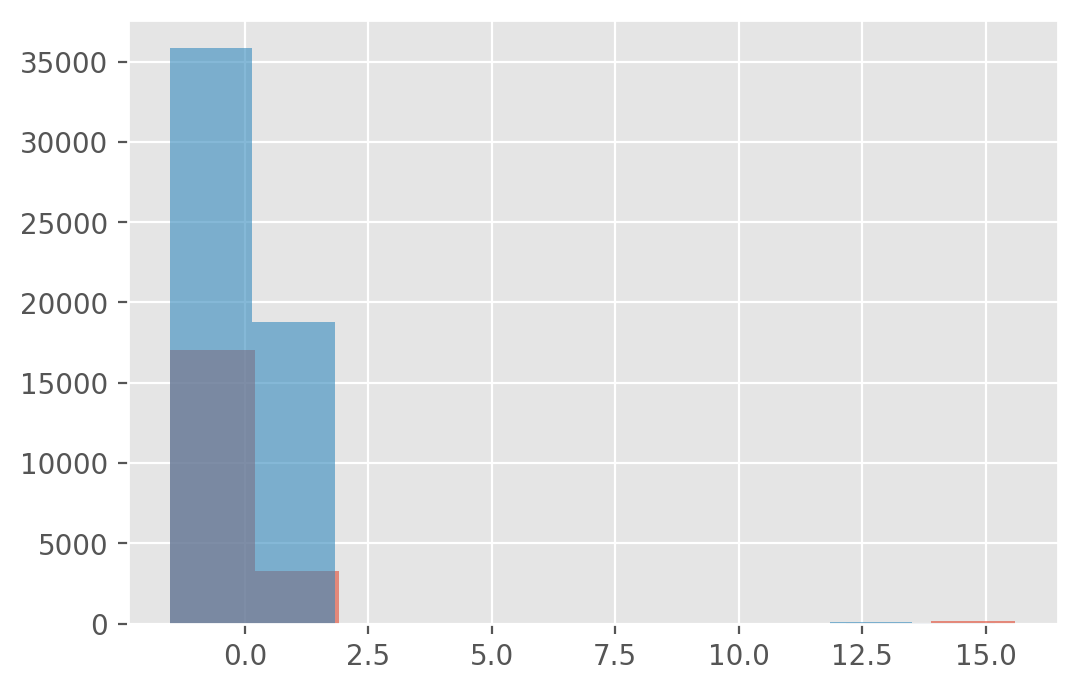

In [9]:
# make hist 
checker[checker['y_target'] ==1]['delta_first_reg'].hist(alpha=.6)
checker[checker['y_target'] ==0]['delta_first_reg'].hist(alpha=.6)


In [10]:
checker2 = checker.copy() 

In [11]:
some_check = checker.dropna(axis=1)
#print(some_check.info())

In [12]:
l1_ratio = 0.4

In [13]:
checkerxx = checker.copy()

In [14]:
checker.columns 

Index(['Var1', 'Var2', 'Var3', 'Var4', 'Var5', 'y_target', 'delta_first_reg',
       'interaction_regreister_delta', 'delta_first_start', 'delta_reg_end',
       'Camp_Length', 'Second', 'Third', '1036', '1216', '1217', '1352',
       '1704', '1729', '2517', '2662', '23384', 'B', 'C', 'D', 'E', 'F', 'G',
       '2100', '2.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0', '9.0', '10.0',
       '11.0', '12.0', '13.0', '14.0', '9999.0', '1', '2', '3', '4'],
      dtype='object')

In [15]:
checker = checker.copy()
# checker = checker.drop(['Var4','11.0', '12.0', '13.0', '14.0','1217', '1352',
#        '1704', '1729', '2517', '2662','7.0','4.0','6.0','3.0'],axis=1)
checker1 = checker.copy() 

checker3 = checker.copy() 
checker4 = checker.copy() 
checker5 = checker.copy() 
checker7 = checker.copy()  
checker8 = checker.copy() 
checker9 = checker.copy() 
checker10 = checker.copy() 
checker11 = checker.copy()  

checker_base = checker.copy() 
trump= [ 'delta_first_reg',
       'interaction_regreister_delta', 'delta_first_start', 'delta_reg_end',
       'Camp_Length', 'Second', 'Third', '1036', '1216', '23384', 'B', 'C',
       'D', 'E', 'F', 'G', '2100', '2.0', '5.0', '8.0', '9.0', '10.0',
       '9999.0', '1', '2', '3', '4']
checker_base   = checker.drop(trump, axis=1)
cb1 = checker_base.copy() 
cb2 = checker_base.copy()
cb3 = checker_base.copy() 
cb4 = checker_base.copy() 
cb5 = checker_base.copy()  
cb7 = checker_base.copy()  
cb9 = checker_base.copy()  
cb10 = checker_base.copy()  
cb11 = checker_base.copy()  
cb12 = checker_base.copy()  
cb20 = checker_base.copy()  

In [16]:
y_to_test = checker11['y_target']


In [17]:
ynotx = y_to_test 
train_test_split(ynotx, shuffle=False) 
X_train,X_test,y_train,y_test = train_test_split(
    checker11,ynotx,test_size = .2, random_state=101)

print(X_train, X_test, y_train,y_test)

from sklearn.linear_model import LogisticRegression
logmodelx = LogisticRegression(penalty='l2', dual=False, tol=1e-4, C=1.0, 
        fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, 
        solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, 
        n_jobs=1, l1_ratio=None ) 
logmodelx.fit(X_train, y_train)

           Var1      Var2      Var3     Var4      Var5  y_target  \
45918 -0.104391 -0.063285 -0.019631 -0.11236 -0.204613       0.0   
20421 -0.104391 -0.063285 -0.019631 -0.11236 -0.204613       0.0   
74357 -0.104391 -0.063285 -0.019631 -0.11236 -0.204613       0.0   
67955 -0.104391 -0.063285 -0.019631 -0.11236 -0.204613       0.0   
5630  -0.104391 -0.063285 -0.019631 -0.11236 -0.204613       0.0   
...         ...       ...       ...      ...       ...       ...   
55293 -0.104391 -0.063285 -0.019631 -0.11236 -0.204613       1.0   
49751 -0.104391 -0.063285 -0.019631 -0.11236 -0.204613       0.0   
5695  -0.104391 -0.063285 -0.019631 -0.11236 -0.204613       1.0   
73542 -0.104391 -0.063285 -0.019631 -0.11236 -0.204613       0.0   
45919 -0.104391 -0.063285 -0.019631 -0.11236 -0.204613       0.0   

       delta_first_reg  interaction_regreister_delta  delta_first_start  \
45918         0.109097                     -0.460866          -0.485503   
20421        -0.461431           

LogisticRegression(n_jobs=1)

In [18]:
pure_probx= logmodelx.predict_proba(X_test)[:,1]
predx = logmodelx.predict(X_test)

In [19]:
g = [ X_train, X_test, y_train,y_test,predx,pure_probx]
for i in g:
    print(len(i))
Xs = X_train - X_test 

60222
15056
60222
15056
15056
15056


In [20]:
'''
A. Take X_train - X_test that creates == TO_check <56458-18820> = 37639
B. Add the column from [logmodelx.predict_proba(X_test)[:,1]] to Take TO_check

def get_specifics(X_train, y_train,predx ):



'''

'\nA. Take X_train - X_test that creates == TO_check <56458-18820> = 37639\nB. Add the column from [logmodelx.predict_proba(X_test)[:,1]] to Take TO_check\n\ndef get_specifics(X_train, y_train,predx ):\n\n\n\n'

In [21]:
predsx, preds2x = predx >= .45 ,predx >= .55
for name, coef in zip(predsx[1:], logmodelx.coef_[0]):
    print("{0}: {1:0.4f}".format(name, coef))

False: 0.0051
False: -0.0154
False: -0.0020
False: -0.0048
False: 0.0661
False: 14.6526
False: -0.0030
False: 0.0146
False: 0.0158
True: 0.0770
True: 0.0942
False: 0.4865
False: 0.4220
False: 0.0060
True: 0.0319
False: 0.0088
True: 0.0251
True: 0.0026
True: 0.0094
False: 0.0642
False: -0.0296
True: -0.1827
True: -0.1865
True: 0.1888
False: 0.1923
False: -0.4220
False: -0.4906
False: 0.4220
False: -0.0840
False: 0.0195
False: 0.0561
False: 0.0313
False: 0.0349
False: 0.0083
False: -0.0148
False: -0.0045
False: -0.0123
False: 0.0130
False: -0.0124
False: -0.0159
False: -0.0107
False: 0.0109
False: -0.1362
False: 0.0814
False: 0.1181
False: 0.0494
False: 0.0512


In [22]:
print(len(predsx), len(X_train), len(X_test))
X_train_len = len(X_train)
X_test_len = len(X_test)
print(X_train_len - X_test_len)

15056 60222 15056
45166


In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test,preds2x) ) 

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     10904
         1.0       1.00      1.00      1.00      4152

    accuracy                           1.00     15056
   macro avg       1.00      1.00      1.00     15056
weighted avg       1.00      1.00      1.00     15056



In [24]:
print(confusion_matrix(y_test,preds2x)) 

[[10904     0]
 [    0  4152]]


In [25]:
print(classification_report(y_test,predsx) ) 

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     10904
         1.0       1.00      1.00      1.00      4152

    accuracy                           1.00     15056
   macro avg       1.00      1.00      1.00     15056
weighted avg       1.00      1.00      1.00     15056



In [26]:
to_try = confusion_matrix(y_test,predsx)
print(to_try) 

[[10904     0]
 [    0  4152]]


In [27]:
(.7+ .36) / (.8 * .94)

1.4095744680851066

In [28]:
checker1.columns

Index(['Var1', 'Var2', 'Var3', 'Var4', 'Var5', 'y_target', 'delta_first_reg',
       'interaction_regreister_delta', 'delta_first_start', 'delta_reg_end',
       'Camp_Length', 'Second', 'Third', '1036', '1216', '1217', '1352',
       '1704', '1729', '2517', '2662', '23384', 'B', 'C', 'D', 'E', 'F', 'G',
       '2100', '2.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0', '9.0', '10.0',
       '11.0', '12.0', '13.0', '14.0', '9999.0', '1', '2', '3', '4'],
      dtype='object')

In [29]:
ynot1 = checker1.pop('y_target')
 

train_test_split(ynot1, shuffle=False) 
X_train,X_test,y_train,y_test = train_test_split(
    checker1,ynot1,test_size = .2, random_state=101)

In [30]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(penalty='l2', dual=False, tol=1e-4, C=1.0, 
        fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, 
        solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, 
        n_jobs=-1, l1_ratio=None ) 
logmodel.fit(X_train, y_train)

LogisticRegression(n_jobs=-1)

In [31]:
pure_probaz = logmodel.predict_proba(X_test)[:,1]
predictionsz = logmodel.predict(X_test)

In [32]:
pure_probaz  
#predictionsz

array([0.09246946, 0.11790684, 0.1269618 , ..., 0.32729316, 0.5487779 ,
       0.44234129])

In [33]:
roc_auc_logmodel = roc_auc_score(y_test, logmodel.fit(X_train, y_train).predict_proba(X_test)[:, -1]) 
print(roc_auc_logmodel)

0.805965700660308


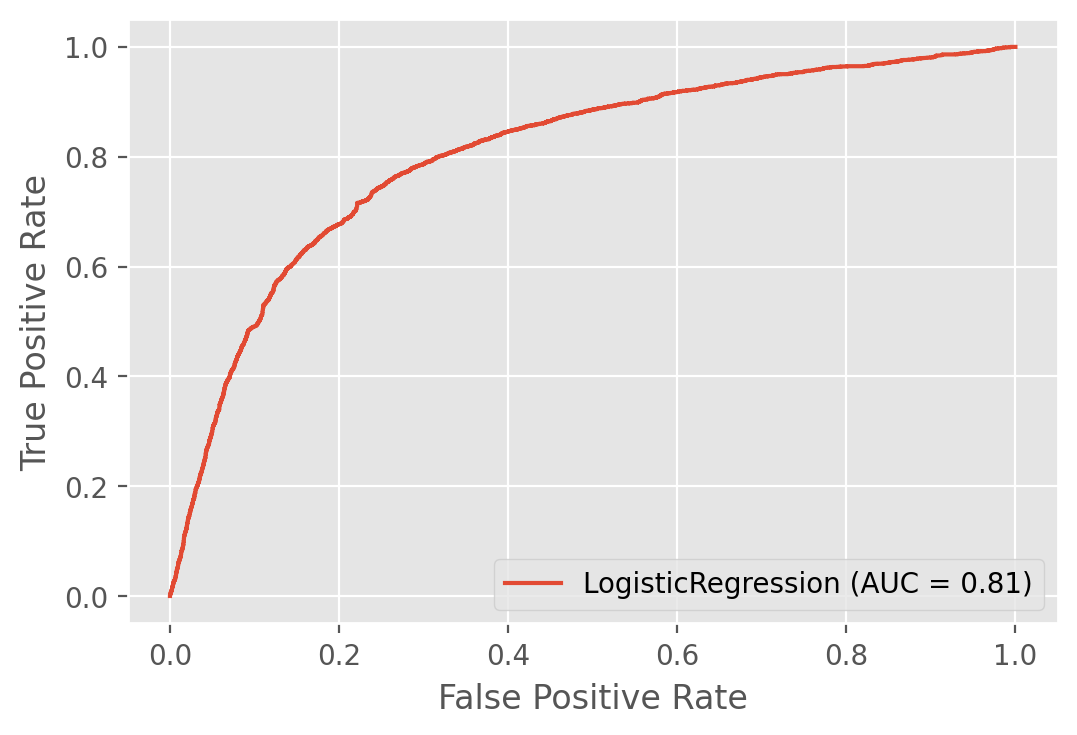

In [34]:
logmodel_disp = plot_roc_curve(logmodel, X_test, y_test)
plt.show()

In [35]:
predsz, preds2z = pure_probaz >= .35 ,pure_probaz >= .5
# for name, coef in zip(preds2z[1:], logmodel.coef_[0]):
#     print("{0}: {1:0.4f}".format(name, coef))

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test,preds2z) ) 

              precision    recall  f1-score   support

         0.0       0.84      0.88      0.86     10904
         1.0       0.63      0.57      0.60      4152

    accuracy                           0.79     15056
   macro avg       0.74      0.72      0.73     15056
weighted avg       0.78      0.79      0.79     15056



In [37]:
print(classification_report(y_test,predsz) )

              precision    recall  f1-score   support

         0.0       0.86      0.82      0.84     10904
         1.0       0.58      0.66      0.62      4152

    accuracy                           0.77     15056
   macro avg       0.72      0.74      0.73     15056
weighted avg       0.79      0.77      0.78     15056



In [38]:
print(confusion_matrix(y_test,preds2z))  

[[9544 1360]
 [1792 2360]]


In [39]:
print(confusion_matrix(y_test,predsz)) 

[[8893 2011]
 [1399 2753]]


In [40]:
from sklearn.inspection import partial_dependence
from sklearn.inspection import plot_partial_dependence


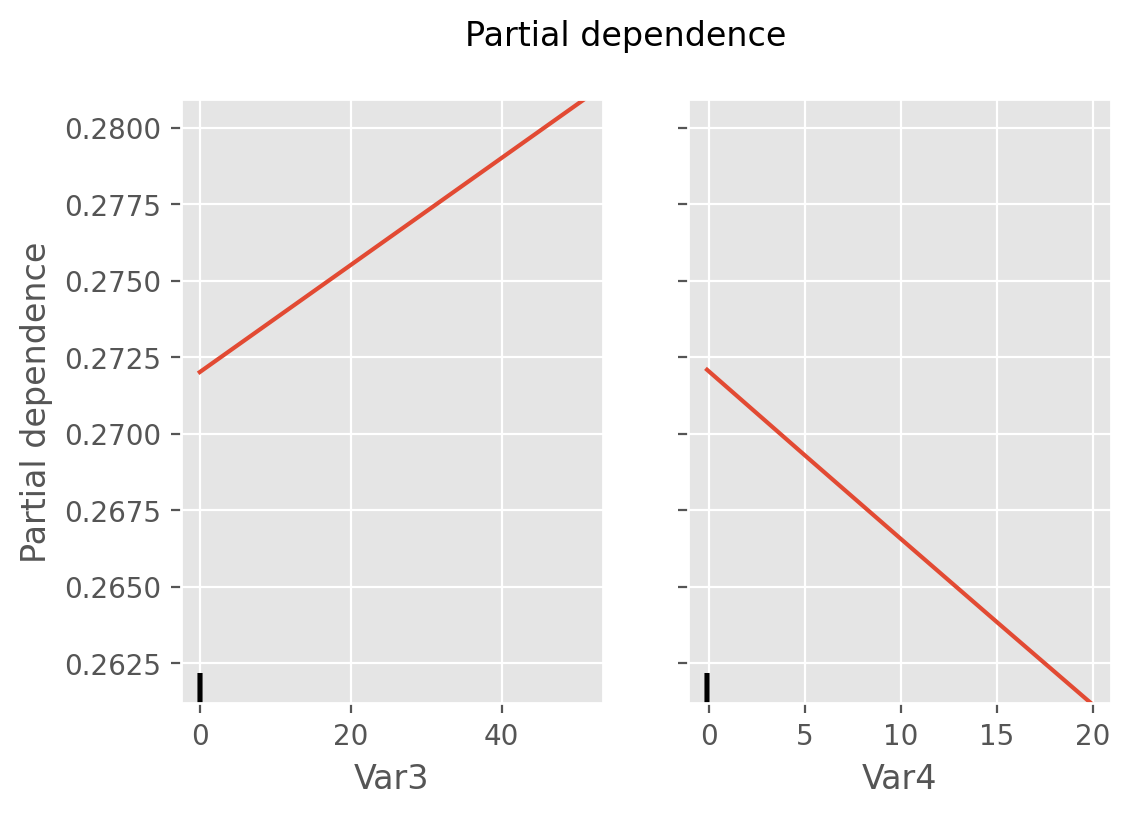

In [41]:
features = ['Var3', 'Var4'] 
'''#, 
, 'delta_first_reg',
       'interaction_regreister_delta', 'delta_first_start', 'delta_reg_end',
       'Camp_Length', 'Second', 'Third', '1036', '1216', '1217', '1352',
       '1704', '1729', '2517', '2662', '23384', 'B', 'C', 'D', 'E', 'F', 'G',
       '2100', '2.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0', '9.0', '10.0',
       '11.0', '12.0', '13.0', '14.0', '9999.0', '1', '2', '3', '4'
'''

display = plot_partial_dependence(logmodel, X_train, features)

display.figure_.suptitle( 'Partial dependence ' )
display.figure_.subplots_adjust(hspace=0.3)

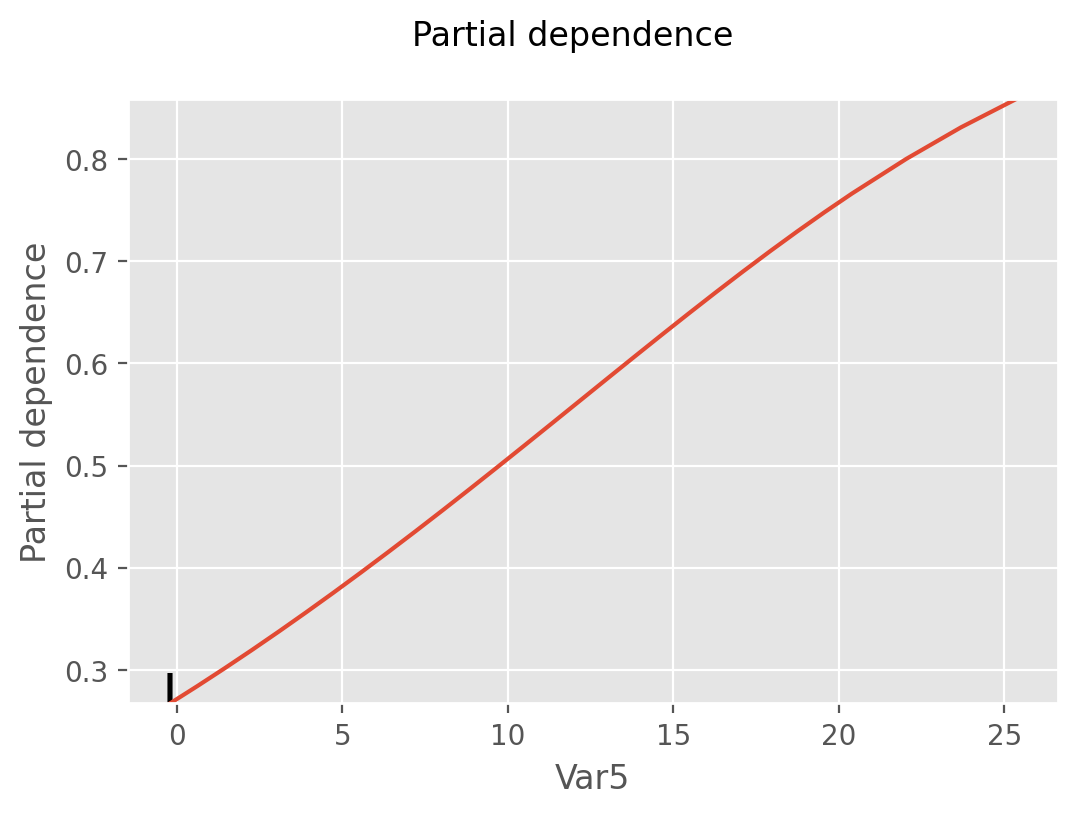

In [42]:
features = ['Var5' ] 
'''#, 
, 'delta_first_reg',
       'interaction_regreister_delta', 'delta_first_start', 'delta_reg_end',
       'Camp_Length', 'Second', 'Third', '1036', '1216', '1217', '1352',
       '1704', '1729', '2517', '2662', '23384', 'B', 'C', 'D', 'E', 'F', 'G',
       '2100', '2.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0', '9.0', '10.0',
       '11.0', '12.0', '13.0', '14.0', '9999.0', '1', '2', '3', '4'
'''

display = plot_partial_dependence(logmodel, X_train, features)

display.figure_.suptitle( 'Partial dependence ' )
display.figure_.subplots_adjust(hspace=0.3)

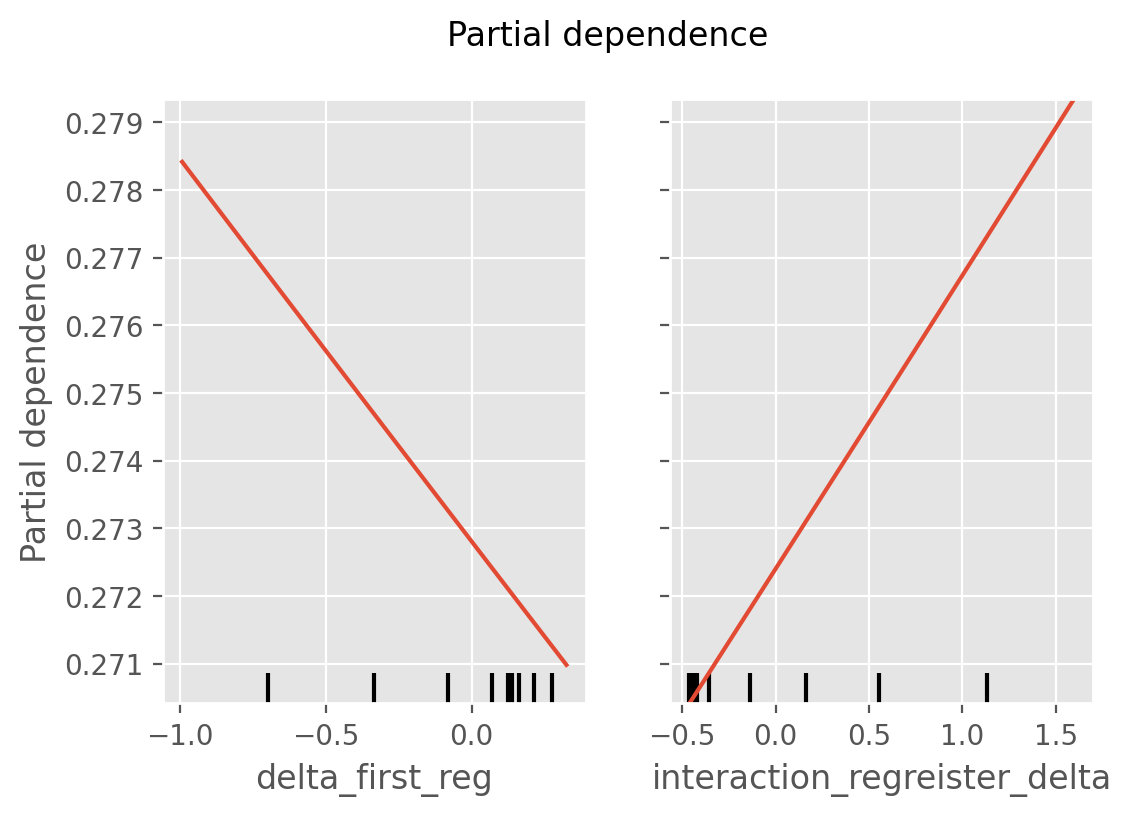

In [58]:
features = ['delta_first_reg',
       'interaction_regreister_delta'] 
'''#, 'Var3', 'Var4', 'Var5'
, , 'delta_first_start', 'delta_reg_end',
       'Camp_Length', 'Second', 'Third', '1036', '1216', '1217', '1352',
       '1704', '1729', '2517', '2662', '23384', 'B', 'C', 'D', 'E', 'F', 'G',
       '2100', '2.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0', '9.0', '10.0',
       '11.0', '12.0', '13.0', '14.0', '9999.0', '1', '2', '3', '4'
'''

display = plot_partial_dependence(logmodel, X_test, features)

display.figure_.suptitle( 'Partial dependence ' )
display.figure_.subplots_adjust(hspace=0.3)

In [44]:
y1 = checker10.pop('y_target') 

In [45]:
kfold = KFold(n_splits=5)

accuracies = []
precisions = []
recalls = []

X_train, X_test, y_train, y_test = train_test_split(checker10, y1)

for train_index, test_index in kfold.split(X_train):
    model = LogisticRegression(solver="lbfgs")
    model.fit(X_train.iloc[train_index], y1.iloc[train_index])
    y_predict = model.predict(X_train.iloc[test_index])
    y_true = y1.iloc[test_index]
    accuracies.append(accuracy_score(y_true, y_predict))
    precisions.append(precision_score(y_true, y_predict))
    recalls.append(recall_score(y_true, y_predict))

print("Accuracy:", np.average(accuracies))
print("Precision:", np.average(precisions))
print("Recall:", np.average(recalls))

/home/allen/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/allen/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/allen/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS RE

Accuracy: 0.7217762820572551
Precision: 0.2
Recall: 5.788712011577424e-05


/home/allen/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/allen/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [46]:

#ynot1 = cb12.pop('y_target')

In [47]:
from sklearn.ensemble import RandomForestClassifier

# y = checker8.pop('y_target')
# X = checker8

y = cb7.pop('y_target')
X = cb7

X_train7, X_test7, y_train7, y_test7 = train_test_split(X, y, random_state=42)

rfc = RandomForestClassifier(n_estimators = 200, max_depth = 10)
rfc.fit(X_train7,y_train7)
rfc_preds = rfc.predict(X_test7)
roc_auc=roc_auc_score(y_test7, rfc.predict_proba(X_test7)[:, -1])
#roc_auc2 = roc_auc_score(y_test, rfc.decision_function(X_test))


In [48]:
print(confusion_matrix(y_test,rfc_preds)) 

[[13589    71]
 [ 5122    38]]


In [49]:
print(roc_auc)

0.5562977453853643


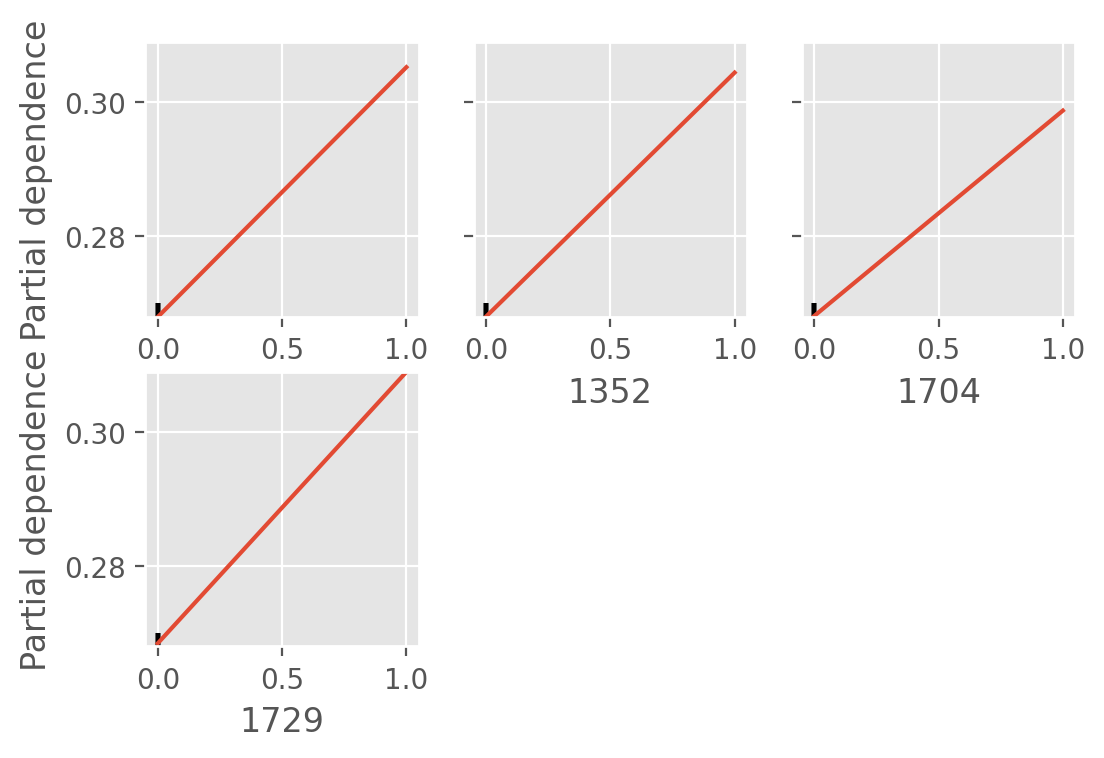

In [50]:
plot_partial_dependence(rfc, features=[5, 6, 7,8], feature_names=X_test7.columns, X=X_test7, grid_resolution=10)

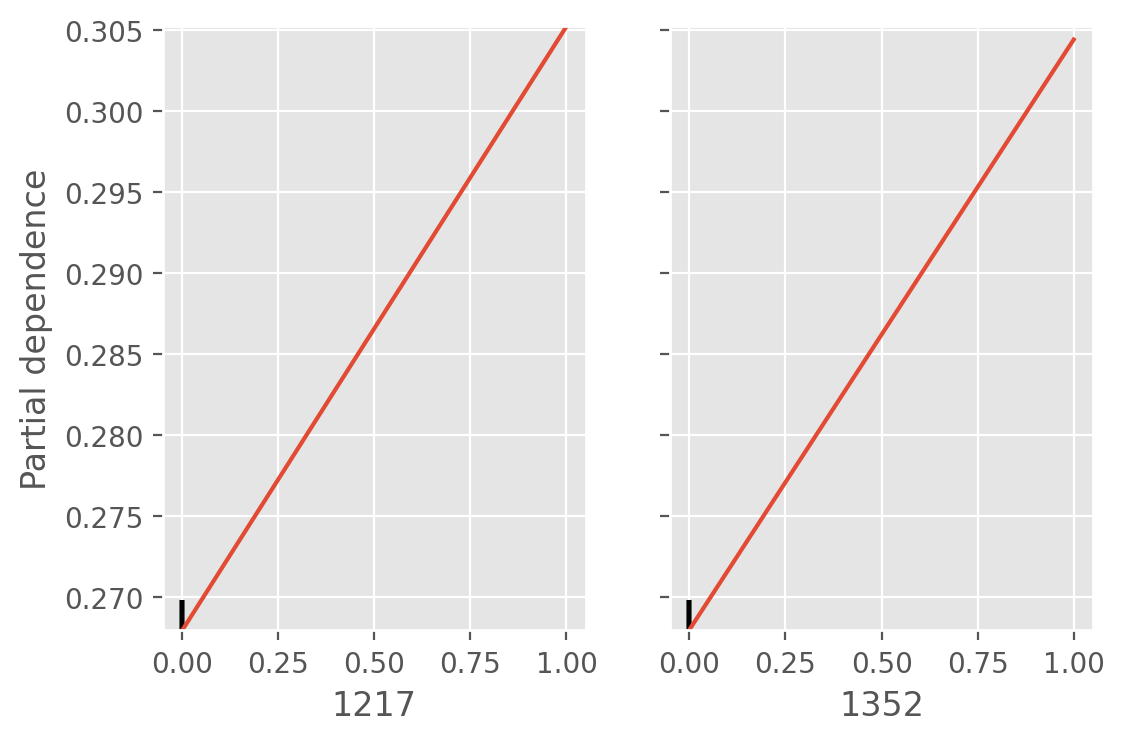

In [51]:
plot_partial_dependence(rfc, features=[5, 6,  ], feature_names=X_test7.columns, X=X_test7, grid_resolution=10)

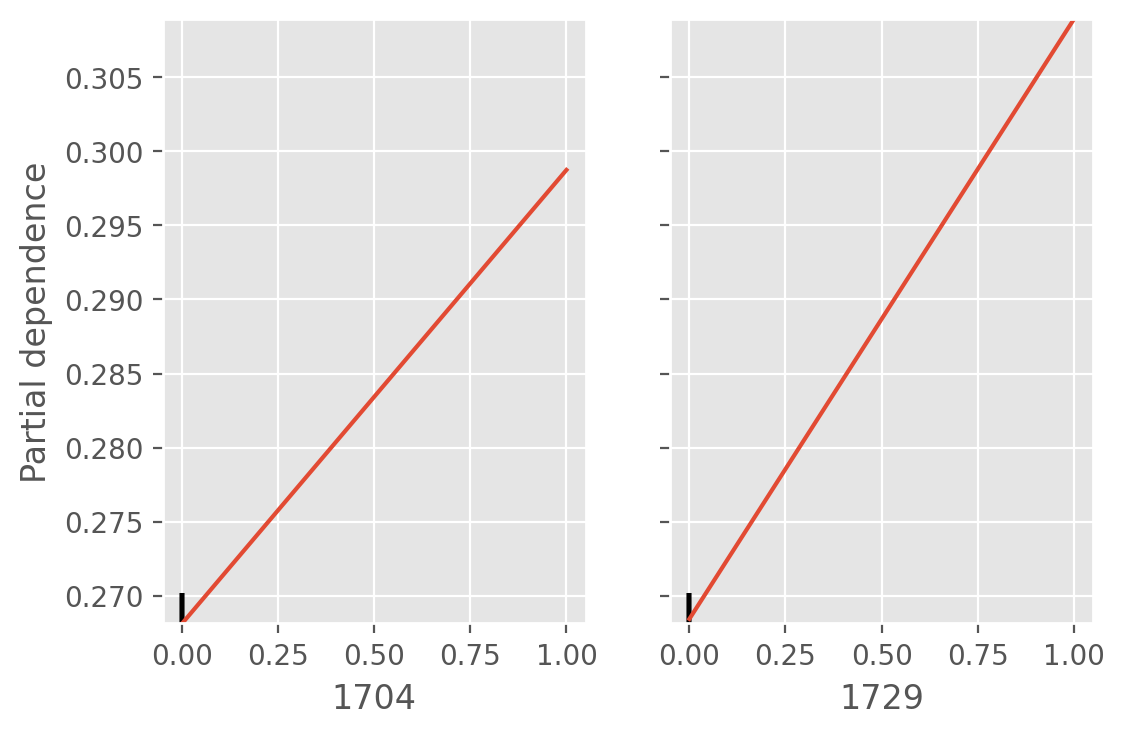

In [52]:
plot_partial_dependence(rfc, features=[ 7,8], feature_names=X_test7.columns, X=X_test7, grid_resolution=10)

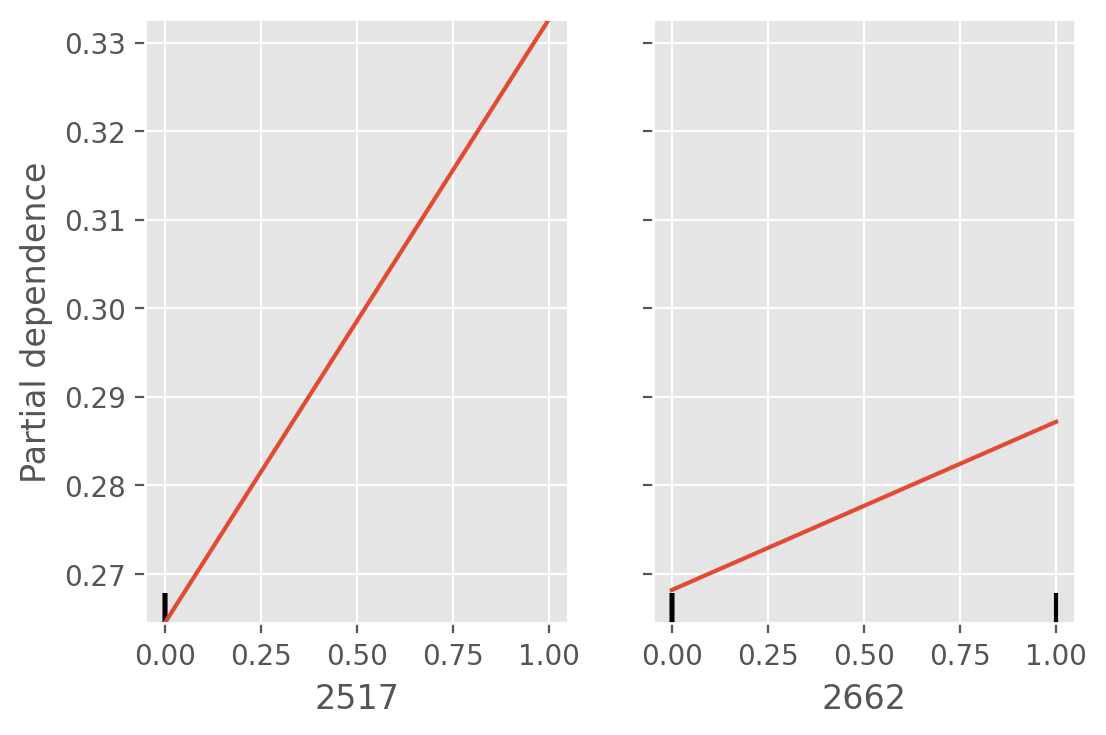

In [53]:
plot_partial_dependence(rfc, features=[9,10], feature_names=X_test7.columns, X=X_test7, grid_resolution=10)

In [54]:
16 print 

SyntaxError: invalid syntax (<ipython-input-54-28bab4753f95>, line 1)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import plot_roc_curve

y = checker8.pop('y_target')
X = checker8

# y = cb4.pop('y_target')
# X = cb4

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

svc = SVC(random_state=42, probability = True)
svc.fit(X_test, y_test)

rfc = RandomForestClassifier(n_estimators = 200, max_depth = 10)
rfc.fit(X_train,y_train)
rfc_preds = rfc.predict(X_test)


print(classification_report(y_test,rfc_preds) ) 
print(confusion_matrix(y_test,rfc_preds)) 

svc_disp = plot_roc_curve(svc, X_test, y_test)
plt.show()
svc_preds = svc.predict(X_test)
svc_proba = svc.predict_proba(X_test)[:,1]

predsx , preds2x = svc_proba  >= .5 , svc_proba  >= .4

print(classification_report(y_test,svc_preds) )
print(confusion_matrix(y_test,svc_preds)) 
svc_disp = plot_roc_curve(svc, X_test, y_test)
plt.show()

In [ ]:
rfc.fit(X_train, y_train)
ax = plt.gca()
ax.set_title('ROC Curve')
rfc_disp = plot_roc_curve(rfc, X_test, y_test, ax=ax, alpha=0.8)
svc_disp.plot(ax=ax, alpha=0.8)
logmodel_disp.plot(ax=ax, alpha=0.8)
plt.show()

In [ ]:
y_trained_sum_of1 = [1 for x in y_train.values if x==1]
print(sum(y_trained_sum_of1), len(y_train.values))
y_test_sum_of1 = [1 for x in y_test.values if x==1]
print(sum(y_test_sum_of1),'y_test', len(y_test.values))

In [ ]:
# try and recombine data frame to examine outputs. 

In [ ]:
checker8.columns

In [ ]:
188543.2 - 117688


In [ ]:
checker7.info()

In [ ]:
20552/102000

In [ ]:
14711*20  * .2

In [ ]:
def cm_to_inch(value):
    return value/2.54

In [ ]:
col_names = X_test.columns 
importances = rfc.feature_importances_
indices = np.argsort(importances)[::-1]
Random_Forest = 'Random Forest'
plt.bar(range(X_test.shape[1]), importances[indices], color="b")
plt.title("{} Feature Importances".format(Random_Forest))
plt.xlabel("Feature")
plt.ylabel("Feature importance")
plt.xticks(range(X_test.shape[1]), col_names[indices], rotation=45, fontsize=12, ha='right')
plt.xlim([-1, X_test.shape[1]])
plt.figure(figsize=(cm_to_inch(15),cm_to_inch(10)))

In [ ]:
print(sum(importances))

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import mean_squared_error

In [ ]:
y = checker9.pop('y_target')
x = checker9 

In [ ]:
X_train9, X_test9, y_train9, y_test9 = train_test_split(x, y, test_size=0.2, random_state=101) 

In [ ]:
train_dmatrix = xgb.DMatrix(data=X_train9,label=y_train9) 
test_dmatrix = xgb.DMatrix(data=X_test9,label=y_test9)

In [ ]:
params = {"objective":'binary:logistic','colsample_bytree': 0.6,'learning_rate': 0.1,
       "min_child_weight": 5 ,'max_depth': 6, 'alpha': 10, 'eval_metric':'auc', 'subsample':0.8} 

cv_results = xgb.cv(dtrain=train_dmatrix, params=params, nfold=5,
                    num_boost_round=50,early_stopping_rounds=100, metrics='auc', as_pandas=True, seed=123)


In [ ]:
#evallist = [(test_dmatrix, 'eval'), (train_dmatrix, 'train')] ,evallist,early_stopping_rounds=50
xgb_one = xgb.train(params,train_dmatrix )
# AssertionError: Must have at least 1 validation dataset for early stopping. 

In [ ]:
ypred = xgb_one.predict(test_dmatrix, ntree_limit =xgb_one.best_ntree_limit )

In [ ]:
to_print = xgb_one.fit(test_dmatrix)

In [ ]:
xgb.plot_importance(xgb_one)
plt.tight_layout()

In [ ]:
from xgboost import XGBRegressor
from pdpbox import pdp
 #,'interaction_regreister_delta', 
#            'delta_first_start', 'delta_reg_end',
#            'Camp_Length', 
my_model = XGBRegressor()
my_model.fit(X_train9, y_train9)
feature = ['delta_first_reg','Second', 'Third']
p = pdp.pdp_isolate(my_model, X_train9, X_train9.columns, feature)
pdp.pdp_plot(p, feature)

In [ ]:
print(ypred)
#print(confusion_matrix(y_test9,ypred  ))  

In [ ]:
xg_reg1 = XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 6, alpha = 8, n_estimators = 12, eval_metric = 'auc', label_encoder=False)
xg_reg1.fit(X_train9,y_train9) 

In [ ]:
xg_reg1_predict = xg_reg1.predict(X_test9) 
xg_reg1_proba = xg_reg1.predict_proba(X_test9)[:,1]

preds_xg1_thresh1, preds2_xg1_thresh2 = xg_reg1_proba >=0.65 , xg_reg1_proba >=0.4

xg_reg1_disp = plot_roc_curve(xg_reg1 , X_test9, y_test9)
plt.show()




In [ ]:
rfc = RandomForestClassifier(n_estimators=10, random_state=42)
rfc.fit(X_train, y_train)
ax = plt.gca()
ax.set_title('ROC Curve')
rfc_disp = plot_roc_curve(rfc, X_test, y_test, ax=ax, alpha=0.8)
xg_reg1_disp2 = plot_roc_curve(xg_reg1, X_test9, y_test9, ax=ax, alpha=0.8) 
svc_disp.plot(ax=ax, alpha=0.8)
logmodel_disp.plot(ax=ax, alpha=0.8)

 
plt.show()

In [ ]:
print(classification_report(y_test9,preds_xg1_thresh1 ) )
print(classification_report(y_test9,preds2_xg1_thresh2 ) )

In [ ]:
print(confusion_matrix(y_test9,preds_xg1_thresh1))  
print(confusion_matrix(y_test9,preds2_xg1_thresh2))  

In [ ]:
[[6166 1409]
 [ 872 2092]]

[[6956  619]
 [1372 1592]]


In [ ]:
pint45 = 1409+2092
pint35 = 619+1592 
print(pint45,pint35)

In [ ]:

for i in ok:
    for ii in i :
        print(f'this is a thing from i -> {ii} being printed')
        
        

TypeError: bar() got multiple values for keyword argument 'bottom'

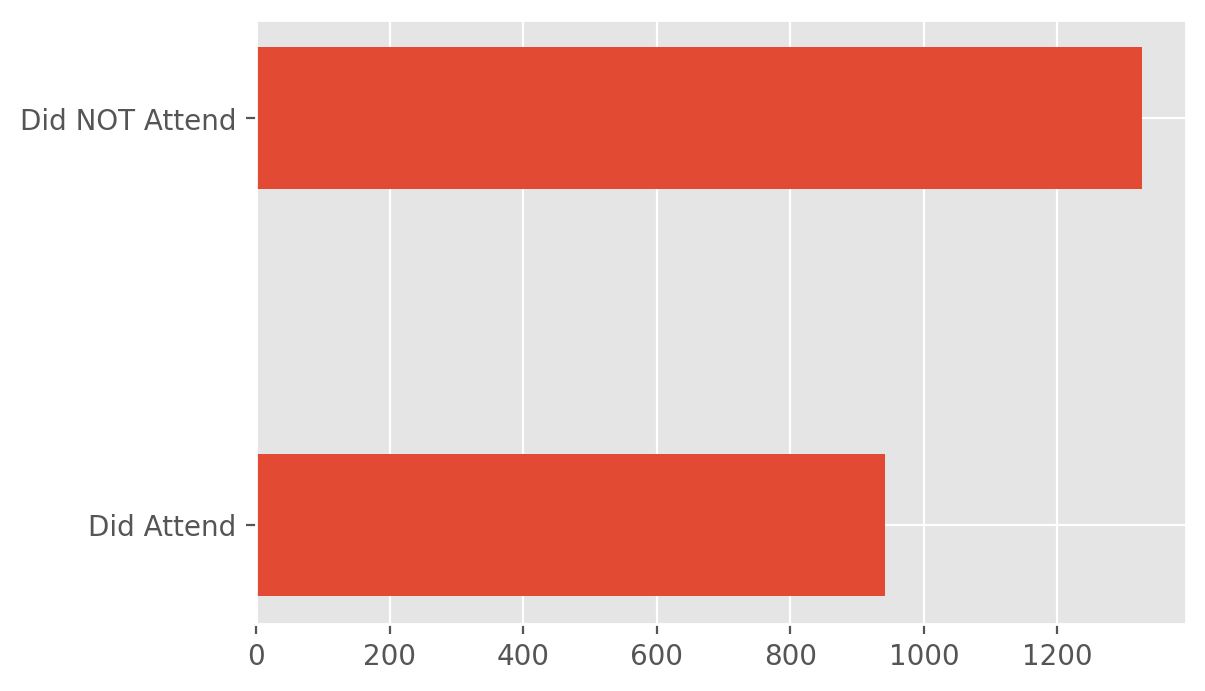

In [55]:
ok=[[6633,  942],
 [1326, 1638]]

labels = ['Did Attend', 'Did NOT Attend'] # model Names
bottoms = [942,1326] # bottom part of column
tops = [ 1638 ,6633 ] # Top part of column

# men_std = [2, 3, 4, 1, 2] # currently not plotting std
# women_std = [3, 5, 2, 3, 3] # currently no plotting std

width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.barh(labels,bottoms, width, label='Incorrectly predicted')
ax.barh(labels, tops, width, bottom=bottoms,
       label='Correctly predicted')

ax.set_ylabel('Counts')
ax.set_title('Analysis of Model Test Results ')
ax.legend()

plt.show()


In [ ]:
# thought for above - should I plot 4 columns - one for each model -  showing the FP and FN split ? 

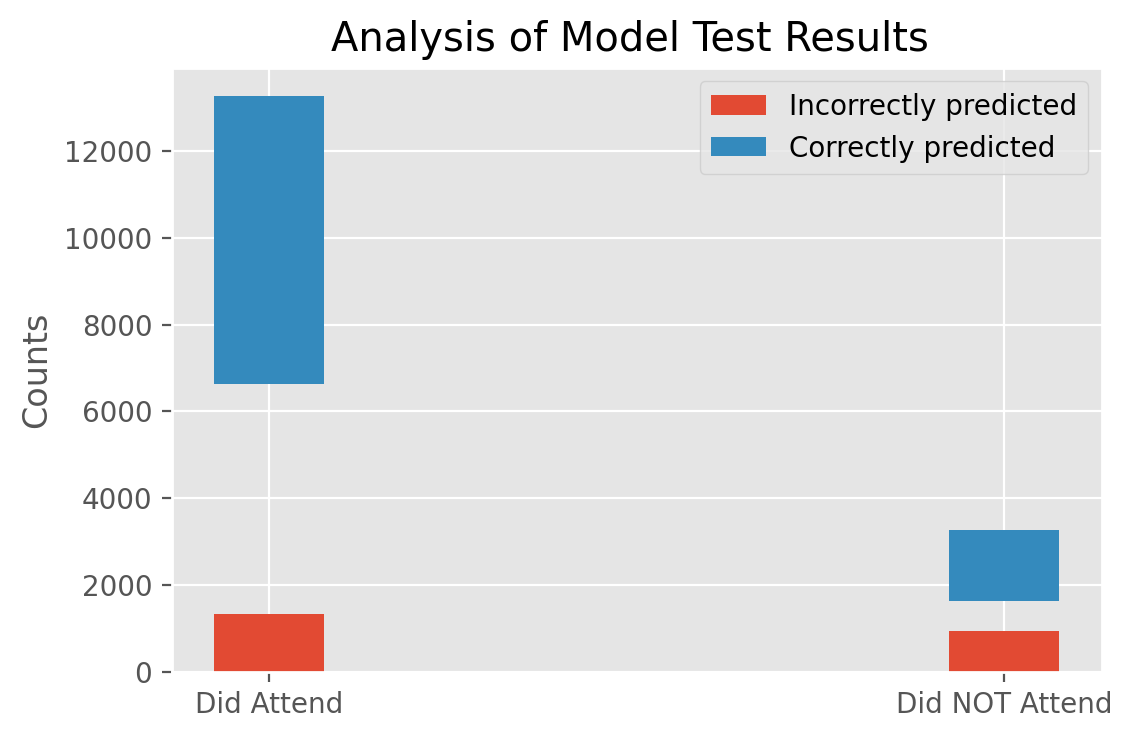

In [56]:
ok=[[6633,  942],
 [1326, 1638]]

labels = ['Did Attend', 'Did NOT Attend'] # model Names
bottoms = [1326,942] # bottom part of column
tops = [ 6633,1638 ] # Top part of column

width = 0.15       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()


ax.bar(labels, bottoms,width,label='Incorrectly predicted')
ax.bar(labels, tops, width, label='Correctly predicted',bottom=tops,)

ax.set_ylabel('Counts')
ax.set_title('Analysis of Model Test Results ')
ax.legend()

plt.show()

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
xg_reg1 = XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 6, alpha = 8, n_estimators = 12, eval_metric = 'auc')

In [ ]:
xg_reg1.fit(X_train,y_train)

In [ ]:
tree1_predict = xg_reg1.predict(X_test) 
tree1_proba = xg_reg1.predict_proba(X_test)

In [ ]:

col_names = X_test.columns 
importances = xg_reg1.feature_importances_
indices = np.argsort(importances)[::-1]
title = 'XG Boost Classifier'
plt.bar(range(X_test.shape[1]), importances[indices], color="b")
plt.title("{} Feature Importances".format(title))
plt.xlabel("Feature")
plt.ylabel("Feature importance")
plt.xticks(range(X_test.shape[1]), col_names[indices], rotation=45, fontsize=12, ha='right')
plt.xlim([-1, X_test.shape[1]])
plt.figure(figsize=(cm_to_inch(15),cm_to_inch(10)))


In [ ]:
xg_reg1_disp = plot_roc_curve(xg_reg1, X_test, y_test)
rfc = RandomForestClassifier(n_estimators=10, random_state=42)
rfc.fit(X_train, y_train)
ax = plt.gca()
rfc_disp = plot_roc_curve(rfc, X_test, y_test, ax=ax, alpha=0.8)
svc_disp.plot(ax=ax, alpha=0.8)
logmodel_disp.plot(ax=ax, alpha=0.8)
plt.show()

In [ ]:
params = {"objective":'binary:logistic','colsample_bytree': 0.6,'learning_rate': 0.1,
       "min_child_weight": 5 ,'max_depth': 6, 'alpha': 10, 'eval_metric':'auc', 'subsample':0.8} 

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=5,
                    num_boost_round=50,early_stopping_rounds=100, metrics='auc', as_pandas=True, seed=123)

In [ ]:
xgb_clf = xgb.XGBClassifier()
xgb_clf = xgb_clf.fit(X_train, y_train)

In [ ]:
uh = xgb_clf.predict(X_test) 
pred_proba = xgb_clf.predict_proba(X_test)

In [ ]:
probs = pred_proba[:,1] 

In [ ]:
col_names = X_test.columns 
importances = xgb_clf.feature_importances_
indices = np.argsort(importances)[::-1]
Random_Forest = 'XG Boost Classifier for xgb_clf'
plt.bar(range(X_test.shape[1]), importances[indices], color="b")
plt.title("{} Feature Importances".format(Random_Forest))
plt.xlabel("Feature")
plt.ylabel("Feature importance")
plt.xticks(range(X_test.shape[1]), col_names[indices], rotation=45, fontsize=12, ha='right')
plt.xlim([-1, X_test.shape[1]])
plt.figure(figsize=(cm_to_inch(25),cm_to_inch(20)))

In [ ]:
# plotdf = pd.DataFrame({"P1":uh ,"P2":probs})
# # ax = plotdf.plot.bar(color=["SkyBlue", "IndianRed"], rot=0, title= "COmpare Results")
# # plt.show()

# df = plotdf.copy()
# df.info()

In [ ]:
df1=df.copy()
for i in to_transfer:
    df1[i] = X_test[i]
print(df1.info())

In [ ]:
 # https://stackoverflow.com/questions/57730192/how-to-save-gridsearchcv-xgboost-model

In [ ]:
xg_reg = XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 8, n_estimators = 10, eval_metric = 'auc')

In [ ]:
xg_reg.fit(X_train,y_train)
preds = xg_reg.predict(X_test)

In [ ]:
print(xg_reg.predict_proba(X_test)) 

In [ ]:
preds

In [ ]:
params = {"objective":'binary:logistic','colsample_bytree': 0.6,'learning_rate': 0.1,
       "min_child_weight": 5 ,'max_depth': 6, 'alpha': 10, 'eval_metric':'auc', 'subsample':0.8} 

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=100, metrics='auc', as_pandas=True, seed=123)


In [ ]:
cv_results[45:]

In [ ]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 200 
# xgb.plot_tree(xg_reg,num_trees=0) # plt.rcParams['figure.figsize'] = [50, 10] # plt.show()

In [ ]:
xgb.plot_importance(xg_reg )
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()

In [ ]:
print(checker3.shape)

In [ ]:
col_names = X_test.columns 
importances = xg_reg.feature_importances_
indices = np.argsort(importances)[::-1]
Random_Forest = 'XG Boost Classifier for xg_reg'
plt.bar(range(X_test.shape[1]), importances[indices], color="b")
plt.title("{} Feature Importances".format(Random_Forest))
plt.xlabel("Feature")
plt.ylabel("Feature importance")
plt.xticks(range(X_test.shape[1]), col_names[indices], rotation=45, fontsize=12, ha='right')
plt.xlim([-1, X_test.shape[1]])
plt.figure(figsize=(cm_to_inch(15),cm_to_inch(10)))

In [ ]:
dataset = np.genfromtxt('/home/allen/Galva/capstones/capstone2/src/explore/train_4_model.csv',delimiter=',' ,skip_header=True)

In [ ]:
print(dataset.shape)

In [ ]:
selector = [x for x in range(dataset.shape[1]) if x !=5]
selector2 = [x for x in range(dataset.shape[1]) if x ==5]

In [ ]:
y = dataset[:,selector]
y2 = dataset[:,selector2]

In [ ]:
y.shape

In [ ]:
x = np.delete(dataset,6,axis=1)

In [ ]:
import tensorflow

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Dense(1,input_dim = 46, activation='sigmoid'))

In [ ]:
model.compile(loss = 'binary_crossentropy',optimizer = 'rmsprop', metrics=['accuracy'])

In [ ]:
gpus = tensorflow.config.experimental.list_physical_devices('GPU')
if gpus:
    try: 
        for gpu in gpus:
            tensorflow.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e, 'BTW ***********************************************')

In [ ]:
model.fit(x=y,y=y2, epochs=20, verbose=1)

In [ ]:
print(y2[:10])

In [ ]:
predictions2 = model.predict(y)
print(predictions2[:10].T)